In [4]:
library(Stat2Data)
library(lattice)
data(Blood1)
b = Blood1

In [8]:
head(b)

SystolicBP,Smoke,Overwt
133,0,2
115,1,0
140,1,1
132,0,2
133,0,1
138,0,1


## 1a

### Major: Categorical, you would need to use ANOVA because there is many different majors. 
### Sex : Categorical, you would use t-test because there is only two categories
### Class Year: Categorical, use ANOVA because there is > 2 categories
### Political inclination: Use anova, because > 2 categories
### Sleep time last night: This is continuous value, so it is quantitative. 
### Study time last night: Quantitative
### Body mass index: Quantitative
### Total amount of money spent on textbooks this year: Quantitative

## 1b

### Does the body mass index of students differ based on which class year they are in? 
### Does the amount of time that slept last night differ between students in different majors? 
### Does the amount of money spent on books this year differ based on a student's major? 

## 2a

In [9]:
t.test(b$SystolicBP ~ b$Smoke)


	Welch Two Sample t-test

data:  b$SystolicBP by b$Smoke
t = -4.4, df = 489.88, p-value = 1.329e-05
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -15.684266  -6.000844
sample estimates:
mean in group 0 mean in group 1 
       139.1838        150.0263 


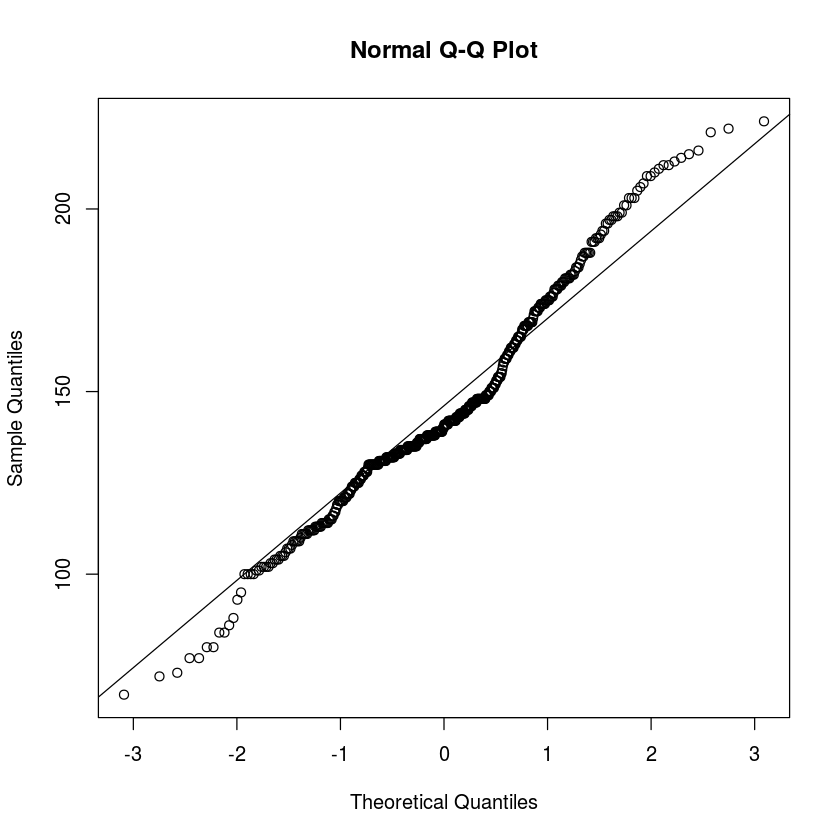

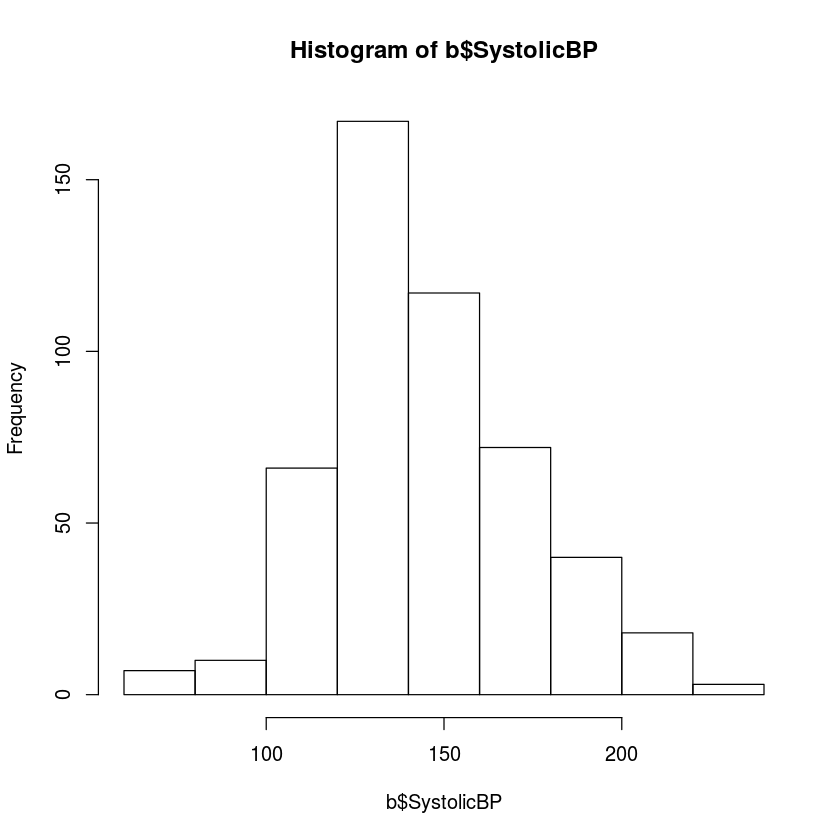

In [20]:
qqnorm(b$SystolicBP)
qqline(b$SystolicBP)
hist(b$SystolicBP)

### Since the confidence interval doesn't contain 0, it is clear that there is a significant difference between the systolic blood pressure of smokers and non-smokers. Furthermore, the normality assumptions looks pretty good. It is safe to conclude that in general smokers have a higher blood pressure by about ten points on average.

## 2b

In [22]:
bloodLm = lm(b$SystolicBP ~ b$Smoke)
summary(bloodLm)
anova(bloodLm)


Call:
lm(formula = b$SystolicBP ~ b$Smoke)

Residuals:
    Min      1Q  Median      3Q     Max 
-72.184 -17.066  -3.184  14.974  75.816 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  139.184      1.797   77.44  < 2e-16 ***
b$Smoke       10.843      2.464    4.40 1.32e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 27.49 on 498 degrees of freedom
Multiple R-squared:  0.03742,	Adjusted R-squared:  0.03549 
F-statistic: 19.36 on 1 and 498 DF,  p-value: 1.324e-05


,Df,Sum Sq,Mean Sq,F value,Pr(>F)
b$Smoke,1,14634.93,14634.9339,19.36085,1.324437e-05
Residuals,498,376439.91,755.9034,NA,NA


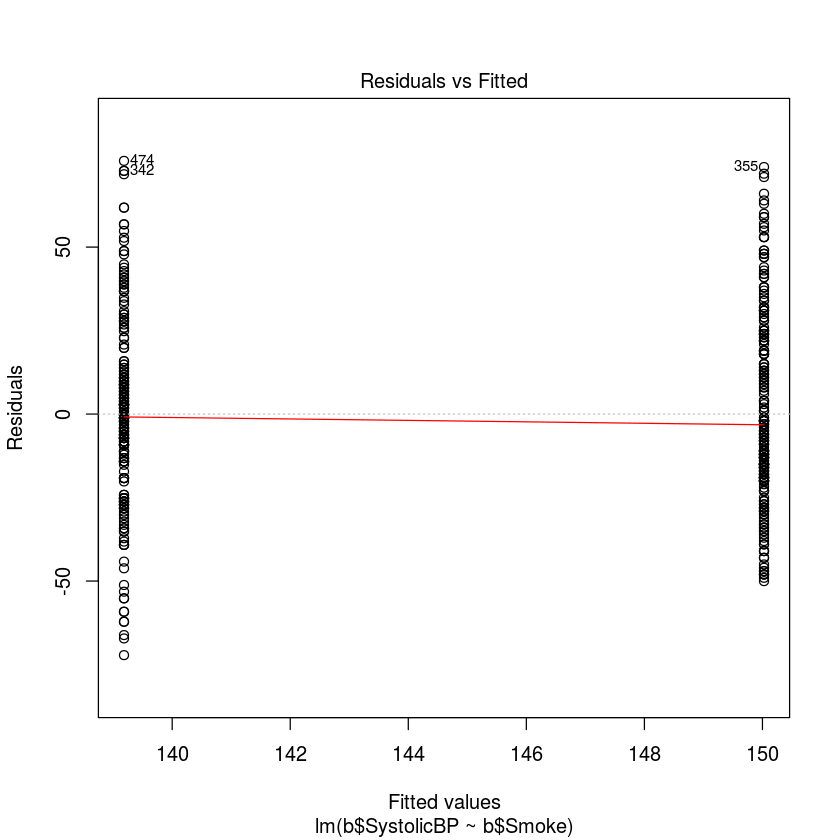

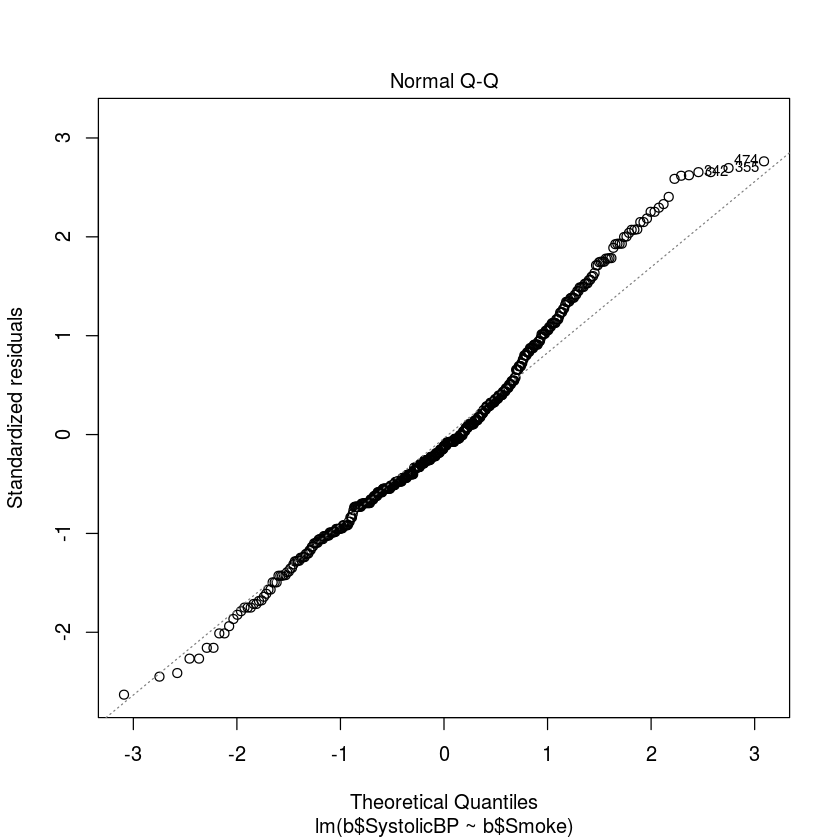

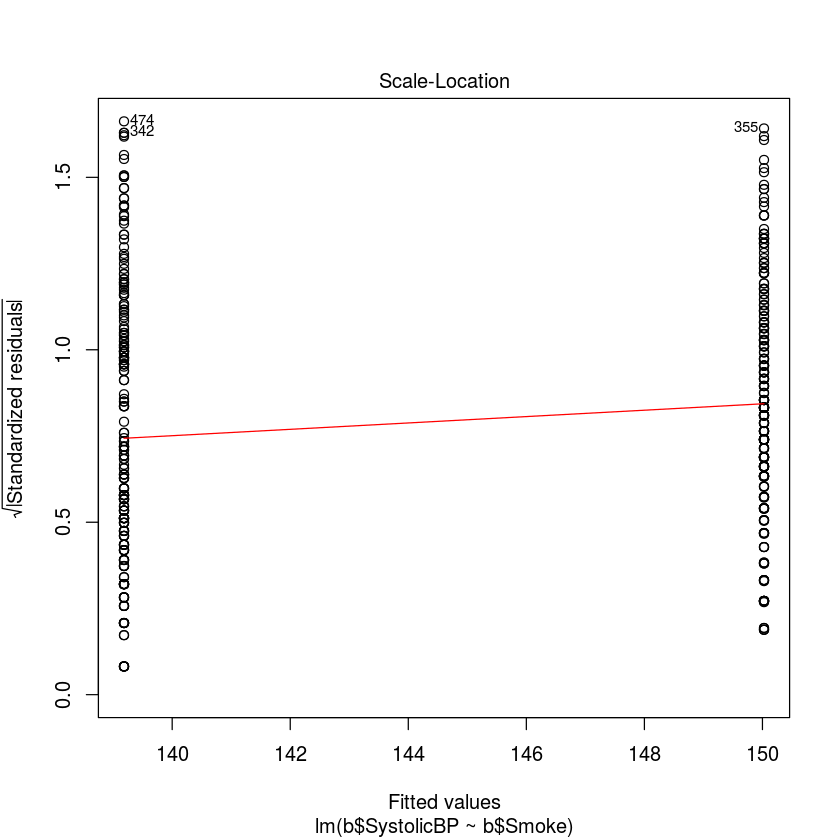

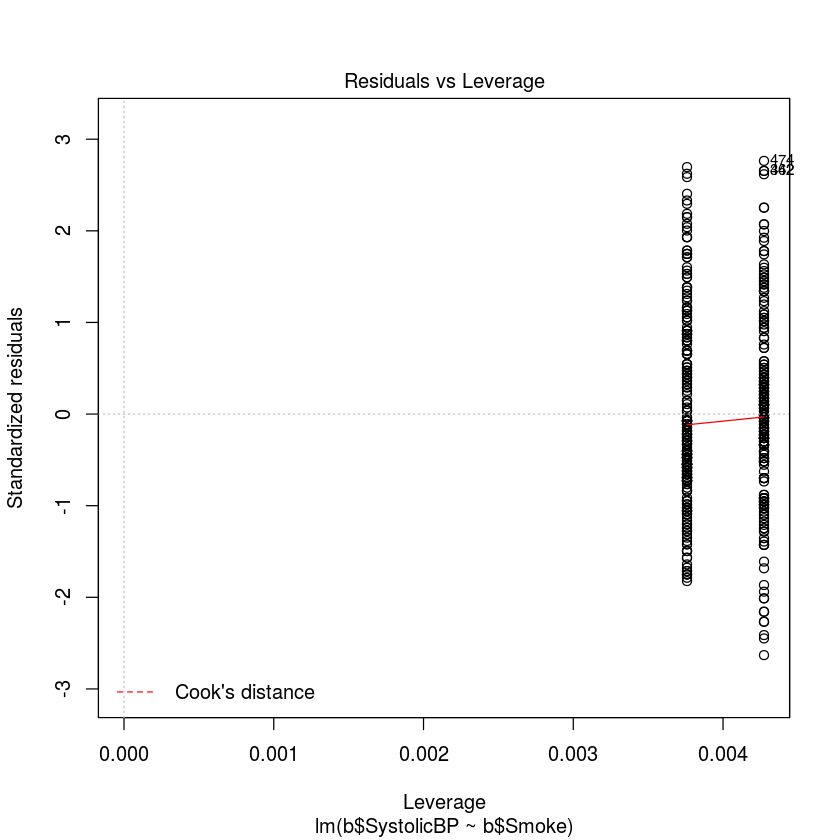

In [21]:
plot(bloodLm)

### The anova F-test indicates that there is a significant difference between systolic blood pressure of smokers and non-smokers (< 1e-4 p-value). Given that the model assumptions for anova seem to be met for the most part (only thing that is questionable is normality but that looks pretty good), we can conclude that smokers generally have higher systolic blood pressure 

## 2c

### There wasn't much difference between these two methods in this case. They both reached the same conclusion (that there is seems to be a real difference between the blood pressure of smokers and non-smokers and that that difference is about 10 points on average). 

## 3a

### We should not use a two sample t-test for this case because we would have to compute 3 pairwise t-tests for the three unique pairings. Because of this, the chance of of commiting a type 2 error is greater than our significance level for a single test (which would be all that is needed in the two group case). Therefore, we should use a test that doesn't increase the chance of commiting a type 2 error. 

## 3b

In [13]:
bAov = aov(b$SystolicBP ~ b$Overwt)
summary(bAov)

             Df Sum Sq Mean Sq F value  Pr(>F)    
b$Overwt      1  27788   27788   38.09 1.4e-09 ***
Residuals   498 363286     729                    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

In [28]:
sd = round(tapply(b$SystolicBP, b$Overwt, sd),2)
group_means = round(tapply(b$SystolicBP, b$Overwt, mean),2)
cbind(group_means, sd)

,group_means,sd
0,136.32,27.27
1,144.37,25.08
2,153.18,27.81


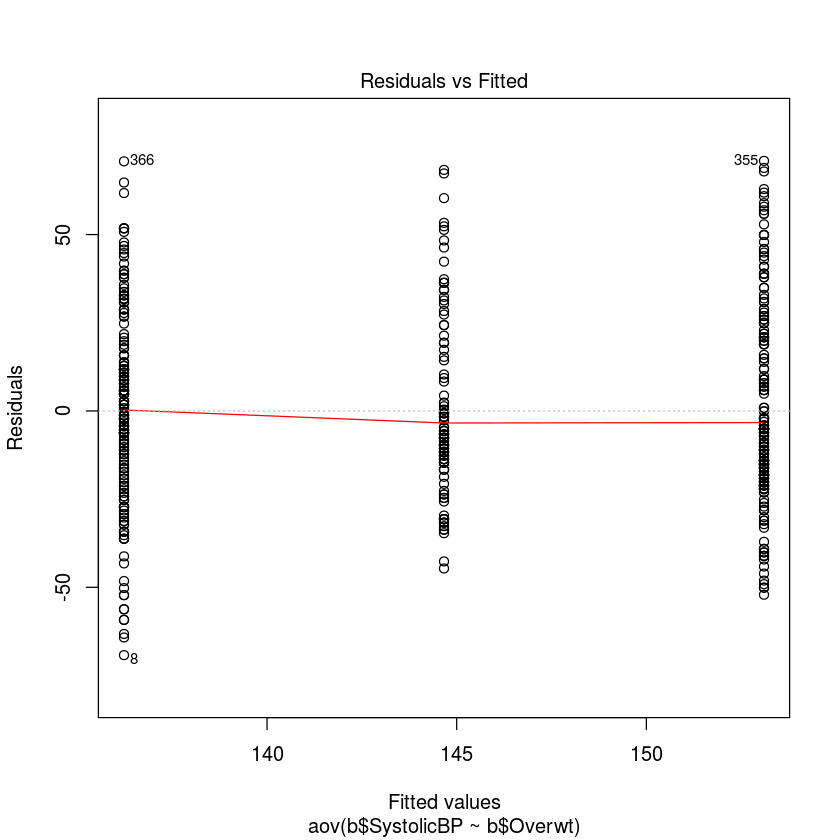

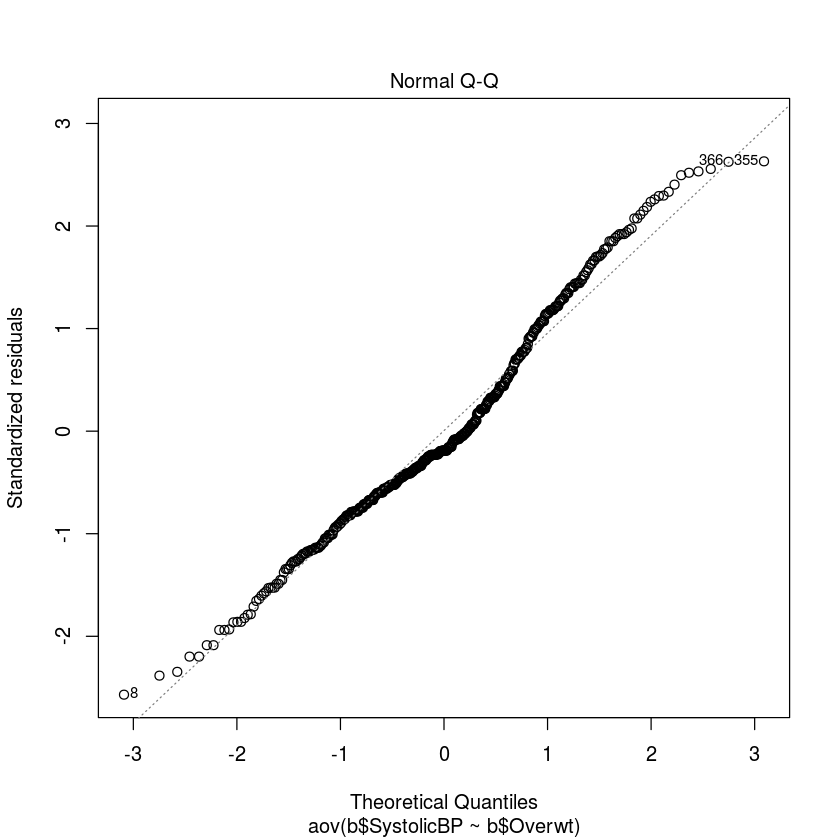

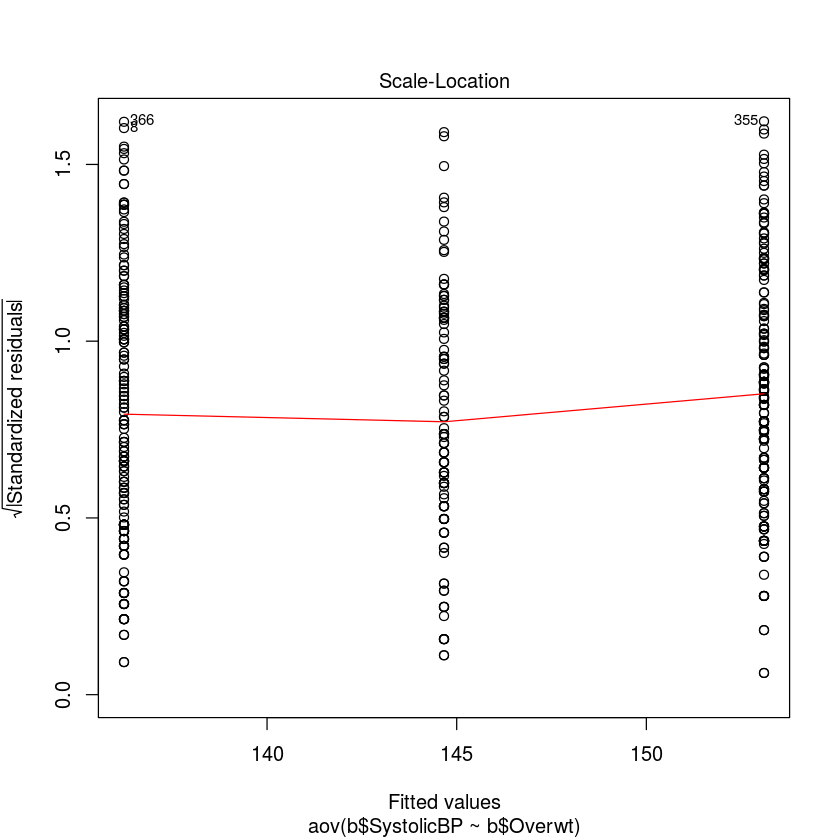

,sd
0,27.27
1,25.08
2,27.81


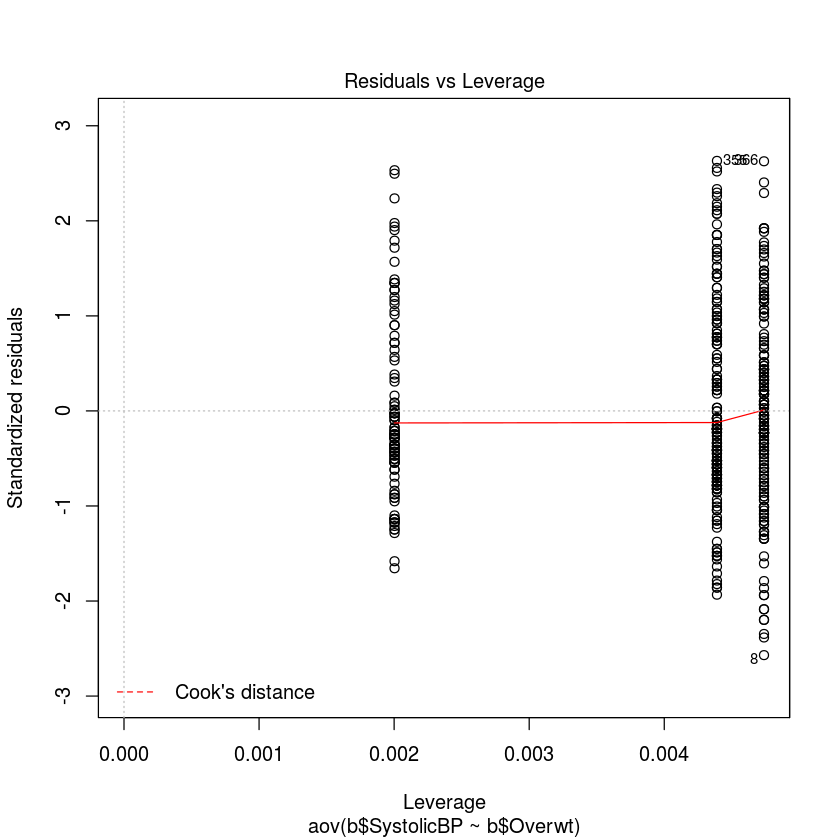

In [26]:
plot(bAov)

### According to the f-test for the one-way anova, there is at least one group that is significantly different from 0. Thus, the fact that a person is overweight, obese, or normal has an effect on their systolic blood pressure. From the group means in the cbind table, we can see that on average as a person becomes more overweight, their systolic blood pressure goes up. The plots indicate zero mean, constant variance (this can be seen in the normality plots and the fact that the standard deviations between the groups are not more than 2 away from each other), and approximate normality so we are safe to believe the results from the one-way anova. 